### 1. Import Libraries

In [63]:
import os
import cv2

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import albumentations as aug
import pathlib as Path
from PIL import Image
import json
import random

### 2. Loading Data

In [64]:
# Définir les chemins vers les données brutes et les ensembles de données spécifiques
raw_data_path = "../data/raw"
leftImg8bit_path = os.path.join(raw_data_path, "leftImg8bit")
gtFine_path = os.path.join(raw_data_path, "gtFine")

### 3. Analyse des fichiers

#### 3.0 Display the images

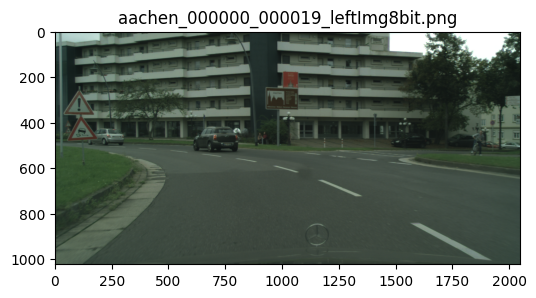

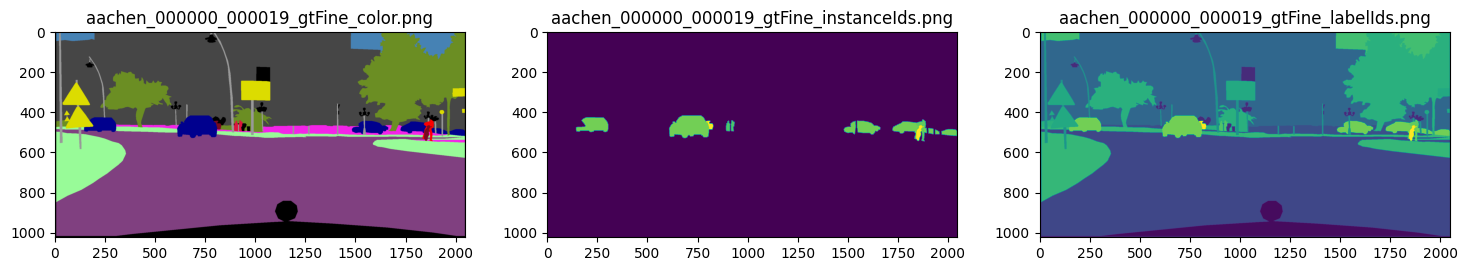

In [65]:
# Définir les répertoires
dir_path_left = os.path.join(
    leftImg8bit_path, "train", "aachen"
)  # chemin vers le répertoire leftImg8bit
dir_path_gt = os.path.join(
    gtFine_path, "train", "aachen"
)  # chemin vers le répertoire gtFine

# Obtenir le fichier PNG qui contient 'aachen_000000' de leftImg8bit
file_left = next(
    f for f in os.listdir(dir_path_left) if "aachen_000000" in f and f.endswith(".png")
)

# Obtenir tous les fichiers PNG qui contiennent 'aachen_000000' de gtFine
files_gt = [
    f for f in os.listdir(dir_path_gt) if "aachen_000000" in f and f.endswith(".png")
]

# Ouvrir l'image de leftImg8bit
img_left = Image.open(os.path.join(dir_path_left, file_left))

# Afficher l'image de leftImg8bit
plt.figure(figsize=(6, 6))
plt.imshow(img_left)
plt.title(file_left)
plt.show()

# Créer une nouvelle figure pour les images de gtFine
plt.figure(figsize=(6 * len(files_gt), 6))

# Afficher chaque image de gtFine
for i, file_gt in enumerate(files_gt, start=1):
    img_gt = Image.open(os.path.join(dir_path_gt, file_gt))

    plt.subplot(1, len(files_gt), i)
    plt.imshow(img_gt)
    plt.title(file_gt)

plt.show()

### 3.1 Analyse fichier leftImg8bit

##### 3.1.1 Affichage des fichiers contenu dans leftImg8bit aachen_000000

In [66]:
def print_directory_structure(path):
    # Parcourir tous les répertoires et fichiers dans le chemin donné
    for dirpath, dirnames, filenames in os.walk(path):
        # Calculer le niveau de profondeur du répertoire actuel
        level = dirpath.replace(path, "").count(os.sep)
        # Créer une indentation en fonction du niveau de profondeur
        indent = " " * 4 * (level)
        # Si le niveau de profondeur est 2 (vous pouvez changer cela selon vos besoins)
        if level == 2:
            # Si le répertoire actuel est dans 'gtFine'
            if "gtFine" in dirpath:
                # Imprimer le nom du répertoire, le nombre de fichiers et le nombre de fichiers divisé par 4
                print(
                    "{}{} - {} fichiers ({} quand divisé par 4)".format(
                        indent,
                        os.path.basename(dirpath),
                        len(filenames),
                        len(filenames) / 4,
                    )
                )
            else:
                # Imprimer le nom du répertoire et le nombre de fichiers
                print(
                    "{}{} - {} fichiers".format(
                        indent, os.path.basename(dirpath), len(filenames)
                    )
                )
        else:
            # Imprimer le nom du répertoire
            print("{}{}/".format(indent, os.path.basename(dirpath)))

In [67]:
# Récupérer tous les fichiers qui commencent par 'aachen_000000'
files = [f for f in os.listdir(dir_path_left) if f.startswith("aachen_000000")]
# Imprimer les noms des fichiers
for file in files:
    print(file)

aachen_000000_000019_leftImg8bit.png


##### 3.1.2 Affichage image

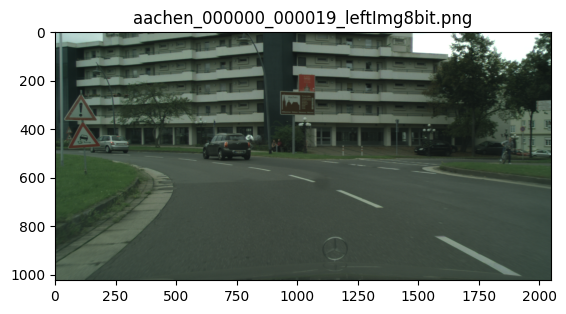

In [68]:
# Define the image path
img_path_left = os.path.join(
    leftImg8bit_path, "train", "aachen", "aachen_000000_000019_leftImg8bit.png"
)

# Open the image
img = Image.open(img_path_left)

# Display the image
plt.imshow(img)
plt.title("aachen_000000_000019_leftImg8bit.png")
plt.show()

##### 3.1.3 Affichage organisation directory

In [69]:
# structure directory leftImg8bit
print("Structure du directory de leftImg8bit:")
print_directory_structure(leftImg8bit_path)

Structure du directory de leftImg8bit:
leftImg8bit/
    test/
        bielefeld - 181 fichiers
        leverkusen - 58 fichiers
        bonn - 46 fichiers
        berlin - 544 fichiers
        mainz - 298 fichiers
        munich - 398 fichiers
    train/
        zurich - 122 fichiers
        strasbourg - 365 fichiers
        weimar - 142 fichiers
        aachen - 174 fichiers
        tubingen - 144 fichiers
        jena - 119 fichiers
        bochum - 96 fichiers
        darmstadt - 85 fichiers
        dusseldorf - 221 fichiers
        hamburg - 248 fichiers
        cologne - 154 fichiers
        monchengladbach - 94 fichiers
        krefeld - 99 fichiers
        ulm - 95 fichiers
        hanover - 196 fichiers
        stuttgart - 196 fichiers
        erfurt - 109 fichiers
        bremen - 316 fichiers
    val/
        munster - 174 fichiers
        lindau - 59 fichiers
        frankfurt - 267 fichiers


### 3.2 Analyse fichier gtFine

##### 3.2.1 Affichage des fichiers contenu dans gtFine aachen_000000

In [70]:
# Récupérer tous les fichiers qui commencent par 'aachen_000000'
files = [f for f in os.listdir(dir_path_gt) if f.startswith("aachen_000000")]

# Imprimer les noms des fichiers
for file in files:
    print(file)

aachen_000000_000019_gtFine_color.png
aachen_000000_000019_gtFine_polygons.json
aachen_000000_000019_gtFine_instanceIds.png
aachen_000000_000019_gtFine_labelIds.png


Ici on voi que pour un fichier dans ``gtFine/aachen/`` on peut trouver 4 fichier
- color.png
- polygons.jsons
- instanceIds.png
- labelIds

##### 3.2.2 Affichage image

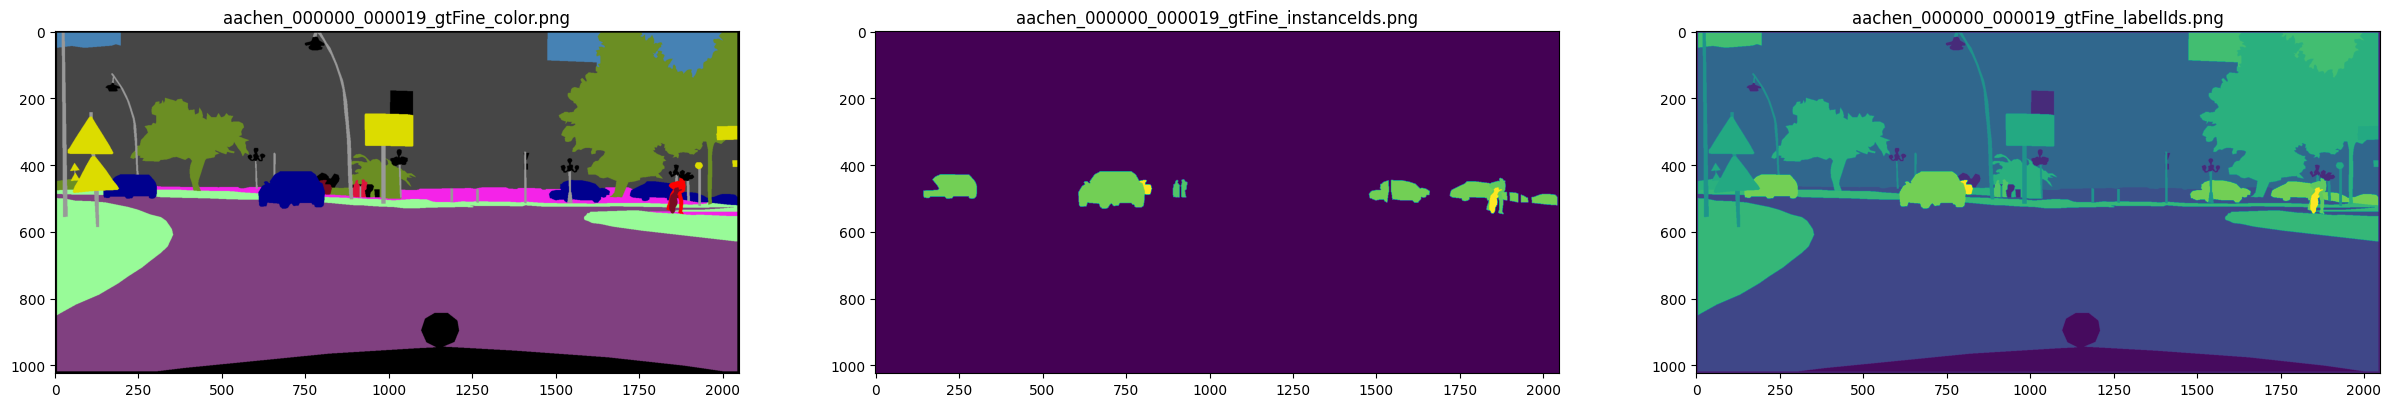

In [71]:
# Récupérer tous les fichiers qui commencent par 'aachen_000000' et se terminent par '.png'
files = [
    f
    for f in os.listdir(dir_path_gt)
    if f.startswith("aachen_000000") and f.endswith(".png")
]

# Créer une nouvelle figure pour les images
plt.figure(figsize=(10 * len(files), 10))

# Afficher les images
for i, file in enumerate(files, start=1):
    img = Image.open(os.path.join(dir_path_gt, file))

    plt.subplot(1, len(files), i)
    plt.imshow(img)
    plt.title(file)

plt.show()

##### 3.2.3 Affichage organisation directory

In [72]:
# structure de directory gtFine
print("Directory structure of gtFine:")
print_directory_structure(gtFine_path)

Directory structure of gtFine:
gtFine/
    test/
        bielefeld - 724 fichiers (181.0 quand divisé par 4)
        leverkusen - 232 fichiers (58.0 quand divisé par 4)
        bonn - 184 fichiers (46.0 quand divisé par 4)
        berlin - 2176 fichiers (544.0 quand divisé par 4)
        mainz - 1192 fichiers (298.0 quand divisé par 4)
        munich - 1592 fichiers (398.0 quand divisé par 4)
    train/
        zurich - 488 fichiers (122.0 quand divisé par 4)
        strasbourg - 1460 fichiers (365.0 quand divisé par 4)
        weimar - 568 fichiers (142.0 quand divisé par 4)
        aachen - 700 fichiers (175.0 quand divisé par 4)
        tubingen - 576 fichiers (144.0 quand divisé par 4)
        jena - 476 fichiers (119.0 quand divisé par 4)
        bochum - 384 fichiers (96.0 quand divisé par 4)
        darmstadt - 340 fichiers (85.0 quand divisé par 4)
        dusseldorf - 884 fichiers (221.0 quand divisé par 4)
        hamburg - 992 fichiers (248.0 quand divisé par 4)
        colo

##### 3.2.4 Affichage ids de l'image

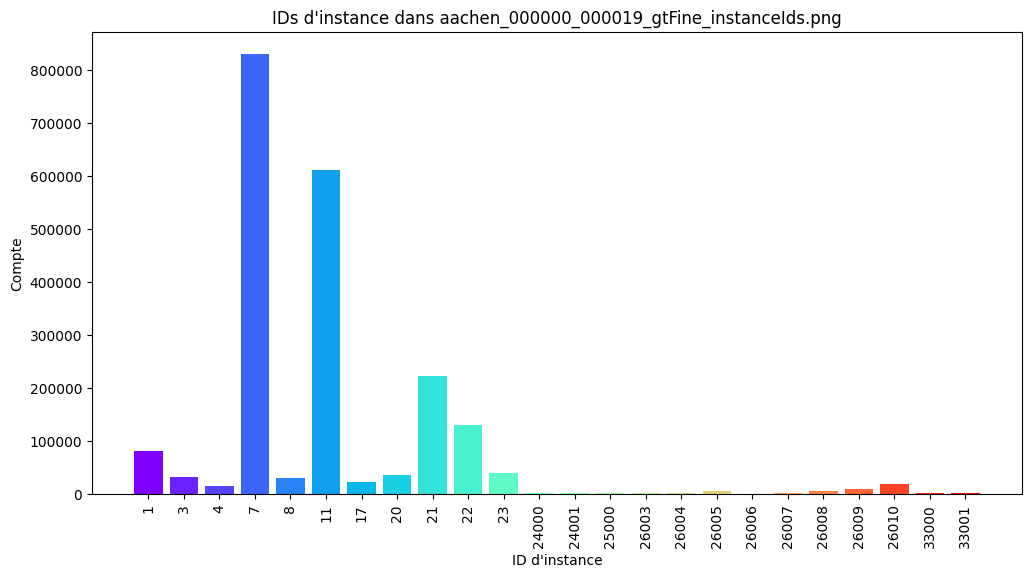

In [73]:
# Charger l'image instanceIds
img_path = os.path.join(
    gtFine_path, "train", "aachen", "aachen_000000_000019_gtFine_instanceIds.png"
)
img = np.array(Image.open(img_path))

# Obtenir les ID d'instance uniques et leurs comptes
unique_ids, counts = np.unique(img, return_counts=True)

# Supprimer l'ID de l'arrière-plan (généralement 0)
mask = unique_ids != 0
unique_ids, counts = unique_ids[mask], counts[mask]

# Créer une carte de couleurs
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_ids)))

# Créer un graphique à barres
plt.figure(figsize=(12, 6))
plt.bar(range(len(unique_ids)), counts, tick_label=unique_ids, color=colors)
plt.xlabel("ID d'instance")
plt.ylabel("Compte")
plt.title("IDs d'instance dans aachen_000000_000019_gtFine_instanceIds.png")
plt.xticks(rotation=90)
plt.show()

### 4. Categories

On prend la première ville disponible dans le fichier : ``Aachen``

In [74]:
list_dir = os.listdir(os.path.join(leftImg8bit_path, "train"))
city = "aachen"

#### 4.1 Affichage de categories en transformant les images en arrays

In [89]:
def substring_after(s, delim):
    # Cette fonction renvoie la sous-chaîne après le délimiteur spécifié dans la chaîne donnée
    return s.partition(delim)[2]


def extract_numbers(filename):
    # Split the filename on '_' and take the second part
    number_part = filename.split("_")[1]
    # Remove '.png' from the end of the string
    number_part = number_part.replace(".png", "")
    # Convert to int and return
    return int(number_part)


# Get the list of files and filter to only include .png files
list_files_gtFine = [
    f
    for f in os.listdir(os.path.join(gtFine_path, "train", city))
    if f.endswith(".png")
]

# Sort the files using the custom key function
list_files_gtFine = sorted(list_files_gtFine, key=extract_numbers)

for i in range(3):
    img = cv2.imread(os.path.join(gtFine_path, "train", city, list_files_gtFine[i]))

    if img is not None and len(img.shape) == 3:
        na = np.array(img)
        colours, counts = np.unique(na.reshape(-1, 3), axis=0, return_counts=1)

        print(f"{substring_after(list_files_gtFine[i], 'gtFine_')} :")

        for j in range(len(colours)):
            print(f"    {colours[j]}: {counts[j]}")
    else:
        print(
            f"Image {list_files_gtFine[i]} could not be loaded or is not a color image."
        )

color.png :
    [0 0 0]: 127841
    [  0   0 255]: 2270
    [  0 220 220]: 34863
    [ 32  11 119]: 2309
    [ 35 142 107]: 221654
    [ 60  20 220]: 1588
    [70 70 70]: 611938
    [128  64 128]: 831082
    [142   0   0]: 42659
    [152 251 152]: 130185
    [153 153 153]: 22846
    [180 130  70]: 38722
    [232  35 244]: 29195
 :
    [0 0 0]: 130007
    [  0   0 255]: 45427
    [  0 255   0]: 38202
    [100 100 100]: 353271
    [120   0 120]: 58073
    [200 200   0]: 3873
    [200 200 200]: 609890
    [255   0   0]: 858409
instanceIds.png :
    [0 0 0]: 2048326
    [93 93 93]: 1588
    [97 97 97]: 2270
    [101 101 101]: 42659
    [128 128 128]: 2309


#### 4.2 Affichage des noms de tous le categories de labels dans les images de gtFine

In [78]:
# Get the list of files and filter to only include .json files
list_files_gtFine = [
    f
    for f in os.listdir(os.path.join(gtFine_path, "train", city))
    if f.endswith(".json")
]

In [79]:
# Initialize an empty set to store all unique labels
all_labels = set()

# Sort the files using the custom key function
list_files_gtFine = sorted(list_files_gtFine, key=extract_numbers)

# Process all JSON files
for file in list_files_gtFine:
    # Open the JSON file in read mode
    with open(os.path.join(gtFine_path, "train", city, file), "r") as f:
        data = json.load(f)

    # Make sure data is a list of dictionaries
    if isinstance(data, dict) and "objects" in data:
        data = data["objects"]

    # Extract all unique labels and add them to the set of all labels
    labels = set(obj["label"] for obj in data)
    all_labels.update(labels)

# Print all unique labels
for label in all_labels:
    print(label)

trailer
sky
terrain
caravan
bicyclegroup
license plate
wall
pole
cargroup
building
sidewalk
out of roi
ground
bridge
vegetation
polegroup
car
parking
traffic light
rider
person
persongroup
motorcycle
bus
road
guard rail
truck
fence
tunnel
dynamic
ego vehicle
bicycle
traffic sign
static


#### 4.3 Creation Masks pour reduire les categories (based on this https://www.cityscapes-dataset.com/dataset-overview/)

In [80]:
cats = {
    "bicycle": "vehicle",
    "bicyclegroup": "vehicle",
    "bridge": "construction",
    "building": "construction",
    "bus": "vehicle",
    "car": "vehicle",
    "caravan": "vehicle",
    "cargroup": "vehicle",
    "dynamic": "void",
    "ego vehicle": "void",
    "fence": "construction",
    "ground": "void",
    "guard rail": "construction",
    "license plate": "vehicle",
    "motorcycle": "vehicle",
    "motorcyclegroup": "vehicle",
    "out of roi": "void",
    "parking": "flat",
    "person": "human",
    "persongroup": "human",
    "pole": "object",
    "polegroup": "object",
    "rail track": "construction",
    "rectification border": "void",
    "rider": "human",
    "ridergroup": "human",
    "road": "flat",
    "sidewalk": "flat",
    "sky": "sky",
    "static": "void",
    "terrain": "nature",
    "traffic light": "object",
    "traffic sign": "object",
    "trailer": "vehicle",
    "train": "vehicle",
    "truck": "vehicle",
    "truckgroup": "vehicle",
    "tunnel": "construction",
    "vegetation": "nature",
    "wall": "construction",
}

cats_color = {
    "void": (0, 0, 0),
    "flat": (255, 0, 0),
    "construction": (200, 200, 200),
    "object": (120, 0, 120),
    "nature": (100, 100, 100),
    "sky": (0, 255, 0),
    "human": (200, 200, 0),
    "vehicle": (0, 0, 255),
}

cats_id = {
    "void": (0),
    "flat": (1),
    "construction": (2),
    "object": (3),
    "nature": (4),
    "sky": (5),
    "human": (6),
    "vehicle": (7),
}

#### 4.4 Test application mask sur les categories

In [87]:
# Initialiser un dictionnaire vide pour stocker tous les labels uniques et leurs identifiants correspondants
all_labels = {}

# Obtenir la liste des fichiers et filtrer pour n'inclure que les fichiers .json
list_files_gtFine = [
    f
    for f in os.listdir(os.path.join(gtFine_path, "train", city))
    if f.endswith(".json")
]

# Trier les fichiers en utilisant la fonction de clé personnalisée
list_files_gtFine = sorted(list_files_gtFine, key=extract_numbers)

# Traiter tous les fichiers JSON
for file in list_files_gtFine:
    # Ouvrir le fichier JSON en mode lecture
    with open(os.path.join(gtFine_path, "train", city, file), "r") as f:
        data = json.load(f)

    # S'assurer que les données sont une liste de dictionnaires
    if isinstance(data, dict) and "objects" in data:
        data = data["objects"]

    # Extraire tous les labels uniques et les ajouter au dictionnaire de tous les labels
    for obj in data:
        label = obj["label"]
        if label in cats:
            all_labels[label] = cats_id[cats[label]]

# Imprimer tous les labels uniques et leurs identifiants correspondants
for label, id in all_labels.items():
    print(f"{label}: {id}")

road: 1
sidewalk: 1
car: 7
sky: 5
terrain: 4
building: 2
vegetation: 4
pole: 3
traffic sign: 3
static: 0
bicycle: 7
person: 6
license plate: 7
rider: 6
ego vehicle: 0
out of roi: 0
ground: 0
traffic light: 3
dynamic: 0
wall: 2
cargroup: 7
fence: 2
bicyclegroup: 7
motorcycle: 7
parking: 1
persongroup: 6
bus: 7
bridge: 2
trailer: 7
polegroup: 3
tunnel: 2
caravan: 7
truck: 7
guard rail: 2


#### 4.5 test application mask sur les images

In [82]:
def draw_on_mask(mask, obj, dic_label, dic_color, default_value="void"):
    # Convertir le polygone en tableau numpy
    polygon = np.array(obj["polygon"], dtype=np.int32)
    # Récupérer le label de l'objet
    label = obj["label"]
    # Récupérer le label final à partir du dictionnaire, si le label n'existe pas, utiliser la valeur par défaut
    final_label = dic_label.get(label, default_value)
    # Dessiner le polygone sur le masque avec la couleur correspondante
    cv2.fillPoly(mask, [polygon], dic_color[final_label])
    return mask


def get_mask_from_file_json(files_json: str, color: bool = True):
    # Ouvrir le fichier json
    with open(files_json) as read:
        data = json.load(read)
        # Récupérer la hauteur et la largeur de l'image
        imgHeight = int(data["imgHeight"])
        imgWidth = int(data["imgWidth"])

        # Si color est True, créer un masque en couleur
        if color:
            image_shape = (imgHeight, imgWidth, 3)
            segmap = np.zeros(image_shape, dtype=np.uint8)
            # Pour chaque objet dans les données, dessiner l'objet sur le masque
            for obj in data["objects"]:
                segmap = draw_on_mask(segmap, obj, cats, cats_color)
        # Sinon, créer un masque en niveaux de gris
        else:
            image_shape = (imgHeight, imgWidth, 1)
            segmap = np.zeros(image_shape, dtype=np.uint8)
            # Pour chaque objet dans les données, dessiner l'objet sur le masque
            for obj in data["objects"]:
                segmap = draw_on_mask(segmap, obj, cats, cats_id)
    return segmap

In [83]:
# Définir le chemin vers le fichier JSON
json_file_path = os.path.join(gtFine_path, "train", city, list_files_gtFine[0])

# Générer les masques
mask_color = get_mask_from_file_json(json_file_path, color=True)  # Masque en couleur
mask_id = get_mask_from_file_json(
    json_file_path, color=False
)  # Masque en niveaux de gris

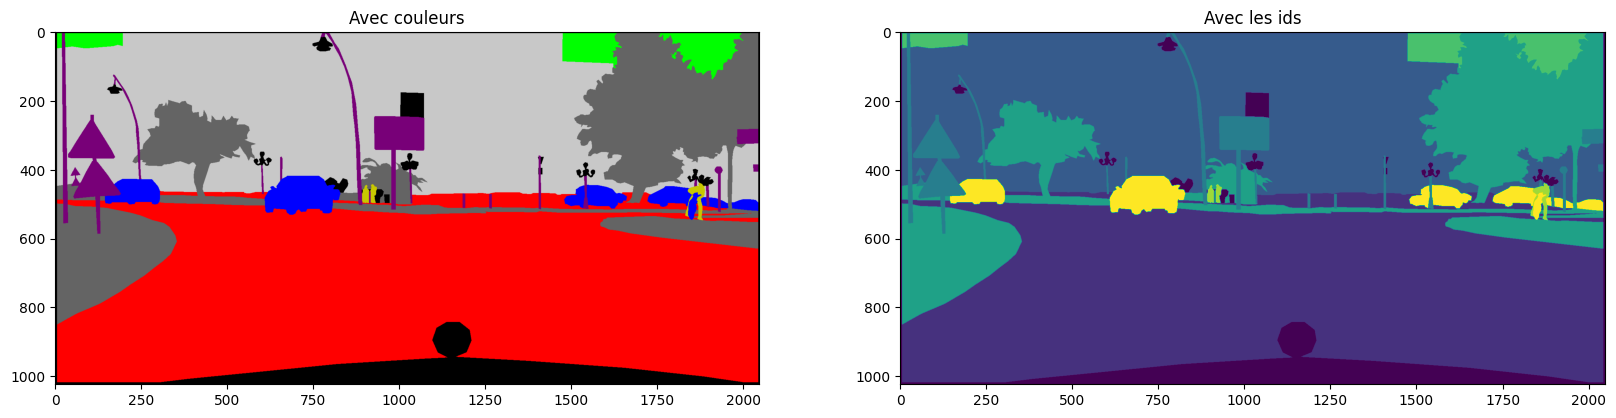

In [88]:
# Créer une figure avec deux sous-graphiques
fig, axs = plt.subplots(1, 2, figsize=(20, 20))

# Afficher le masque en couleur dans le premier sous-graphique
axs[0].imshow(mask_color)
axs[0].set_title("Avec couleurs")

# Afficher le masque en niveaux de gris (avec les ids) dans le deuxième sous-graphique
axs[1].imshow(mask_id)
axs[1].set_title("Avec les ids")

# Afficher la figure
plt.show()